# PCA on yield curve

Consider a yield curve given by $Y(t, X) = F(t, X, X+\tau)$, where $\tau$ is fixed to be 0.25, and $F(t, X, X+\tau)$ is the forward rate for period $(X, X+\tau)$ observed at $t$

The yield curve at time $t$ is given by $\{Y(t, X_1) \dots Y(t, X_N)\}$ for some fixed tenors $(X_1 \dots X_N)$

We are interested in how the yield curve $Y(t)$ moves w.r.t. time


### Swap Rate curve
We have an $n \times p$ data matrix $X$

i.e. we have swap data for $p$ maturies $T_1 = 1Y, T_2 = 2Y, \dots T_p = 30Y$

And with each maturity $T_j$, we have a time series $\{X_t\}^{T_j}$ of $n$ observations

We first compute the daily changes for each maturity $T_j$

$$
D_{ij} = X_i^{T_j} - X_{i-1}^{T_j}
$$

We want to standardize each time series, by subtracting the sample mean and SD of each column (over $n$ days), resulting in the standardized matrix $\hat{X}$

Where j-th column of $\hat{X}$ is the differenced time series of maturity $T_j$, that has zero mean and unit variance. Now we do PCA on $\hat{X}$, and obtain a $p \times p$ PC matrix, each column being $PC_1, \dots PC_p$.

Each entry of $PC_j$ (each row) corresponds to a different maturity

Consider an example of swap rates, given in the book `Statistical Models and Methods for Financial Markets` on page 47:

We have swap rates data for maturities: 1y, 2y, 3y, 4y, 5y, 7y, 10y, 30y. There is a time series of 1256 days (5 years) for each maturity

We know that PC1 along captures 92.6$, and PC2 captures 5.3% of the variance. Only looking at first three PC below:

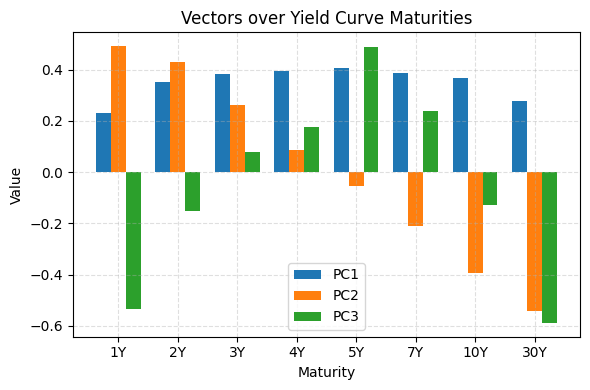

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Vectors
PC1 = [0.231, 0.351, 0.381, 0.393, 0.404, 0.387, 0.365, 0.279]
PC2 = [0.491, 0.431, 0.263, 0.087, -0.054, -0.211, -0.395, -0.541]
PC3 = [-0.535, -0.150, 0.078, 0.175, 0.486, 0.238, -0.127, -0.588]

# Maturities
maturities = ['1Y', '2Y', '3Y', '4Y', '5Y', '7Y', '10Y', '30Y']
x = np.arange(len(maturities))  # Positions

# Plotting
plt.figure(figsize=(6,4))

bar_width = 0.25

plt.bar(x - bar_width, PC1, width=bar_width, label='PC1')
plt.bar(x, PC2, width=bar_width, label='PC2')
plt.bar(x + bar_width, PC3, width=bar_width, label='PC3')

plt.xticks(x, maturities)
plt.xlabel('Maturity')
plt.ylabel('Value')
plt.title('Vectors over Yield Curve Maturities')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


We can see that PC1 refers to the parallel shift component, with roughly identical loadings across different maturities. 

This PC1 represents the idea that an increase in swap rate of any maturity will result in the upward shift of the swap curve, being an first-order approximation of the curve movement.

PC2 is the tilt component, representing a "flattening / deepening" of the curve. Short term moving up means long term rates going down, vice versa.

PC3 is the curvature component, represents the "convexity" of the curve. When one wants to trade the curvature/convexity of the curve, he hedges exposure to PC1 and PC2, and bet that short term and long term rates go up more than middle term rates

### Fed Dataset yield curve

We use the [Fed dataset on yield curve](https://www.federalreserve.gov/data/yield-curve-tables/feds200628_1.html)

In [2]:
import pandas as pd

df = pd.read_csv('../data/PCA/feds200628.csv', skiprows=9)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# want only year after 2023
df = df[df['Date'].dt.year >= 2023]

df.head()


Date     BETA0     BETA1       BETA2       BETA3  SVEN1F01  \
16058 2023-01-02       NaN       NaN         NaN         NaN       NaN   
16059 2023-01-03  0.000043  5.031375 -125.872907  131.460222    4.1544   
16060 2023-01-04  0.000090  5.042619  -38.261344   43.868808    4.0843   
16061 2023-01-05  0.000091  5.102381  -43.524776   48.945547    4.1513   
16062 2023-01-06  0.000017  5.135419   -2.707217   11.546329    3.8941   

       SVEN1F04  SVEN1F09  SVENF01  SVENF02  ...  SVENY23  SVENY24  SVENY25  \
16058       NaN       NaN      NaN      NaN  ...      NaN      NaN      NaN   
16059    3.5031    3.8863   4.3514   3.9039  ...   4.0440   4.0444   4.0408   
16060    3.3750    3.7794   4.3035   3.8171  ...   3.9626   3.9644   3.9622   
16061    3.4002    3.7260   4.3707   3.8797  ...   3.9385   3.9410   3.9397   
16062    3.1987    3.7278   4.1683   3.5968  ...   3.8233   3.8240   3.8215   

       SVENY26  SVENY27  SVENY28  SVENY29  SVENY30      TAU1       TAU2  
16058      NaN      NaN      NaN      NaN      NaN       NaN        NaN  
16059   4.0333   4.0221   4.0075   3.9895   3.9686  9.187250   9.787652  
16060   3.9560   3.9460   3.9325   3.9157   3.8957  8.441780  10.344089  
16061   3.9347   3.9262   3.9143   3.8992   3.8810  8.760276  10.464395  
16062   3.8159   3.8075   3.7964   3.7829   3.7671  4.019105  15.718096  

[5 rows x 100 columns]

### Rates provided

The FED provides those rates:

- Zero-Coupon Yields (Continuously Compounded), up to 30Y maturity  
Which we denote as $R(T)$  
cols: `SVENY01`, `SVENY02`, ..., `SVENY30`  

- Instantaneous Forward Rates (Continuously Compounded), up to 30Y maturity  
Which we denote as $F(T)$
cols: `SVENF01`, `SVENF02`, ..., `SVENF30`

- One-Year Forward Rates   
cols: `SVEN1F01`, `SVEN1F04`, `SVEN1F09`  
Where `F01` = $F(0, y_4, y_5)$ is the one year rate from Y4 to Y5

Recall that price of zero coupon bond:

$$
P(t, T) \cdot e^{R(t, T) \tau} = 1
$$

For simplicity let $t = 0, \tau = T-t = T$,
we have 

$$
P(T) = e^{-R(T) T}
$$

$$
R(T) = -\frac{1}{T} \log p(T)
$$

Recall that the instantaneous forward rate at future $T: $

$$
f(T) = - \frac{\partial}{\partial T} \log p(T)
$$

$$
= \frac{\partial}{\partial T} (T \cdot R(T))
$$

In other words, instantenous $F$ is the gradient of the continuous yield for the period $(0, T)$, given by $T \cdot R(0, T)$


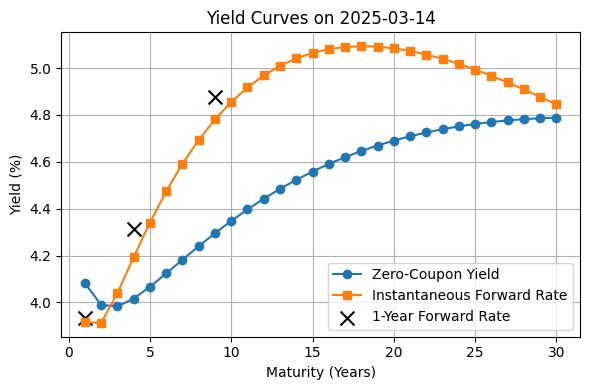

In [3]:
# Use today
latest = df[df['Date'] == df['Date'].max()]

years = list(range(1, 31)) # Maturities for 1 to 30 y

# Extract Zero-Coupon Yields R(t) (SVENYXX)
Rt_cols = [f'SVENY{str(y).zfill(2)}' for y in years]
Rt = latest[Rt_cols].values.flatten() # (30,) array

# Extract Instantaneous Forward Rates (SVENFXX)
Ft_cols = [f'SVENF{str(y).zfill(2)}' for y in years]
Ft = latest[Ft_cols].values.flatten()

# Extract One-Year Forward Rates (SVEN1FXX), if present
F1_cols = [col for col in latest.columns if col.startswith('SVEN1F')]
F1_maturities = [int(col[-2:]) for col in F1_cols]
F1_forward = latest[F1_cols].values.flatten()

plt.figure(figsize=(6,4))
plt.plot(years, Rt, label='Zero-Coupon Yield', marker='o')
plt.plot(years, Ft, label='Instantaneous Forward Rate', marker='s')
# plt.scatter(F1_maturities, F1_forward, label='1-Year Forward Rate')
plt.scatter(F1_maturities, F1_forward, label='1-Year Forward Rate', color='black', marker='x', s=100)

plt.title(f"Yield Curves on {latest['Date'].dt.date.values[0]}")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We check whether $F(T)$ agrees with $\frac{\partial}{\partial T} (T \cdot R(T))$, by interpolating $R(t)$ and plotting here:

/var/folders/fd/vr4zygtx6jxftqb9dm5hvstw0000gn/T/ipykernel_81766/2092646037.py:12: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f_interp, t, dx=1e-6)


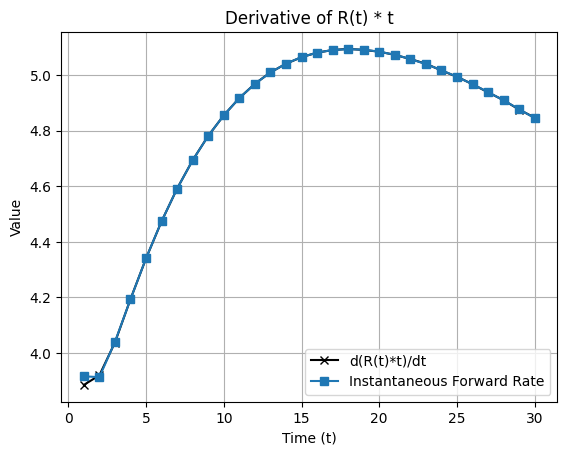

In [4]:
from scipy.interpolate import interp1d
from scipy.misc import derivative  # For numerical derivative

# Step 1: Define x (time) and y = R(t) * t
Rt_times_t = Rt * years

# Step 2: Interpolate R(t)*t
f_interp = interp1d(years, Rt_times_t, kind='cubic', fill_value='extrapolate')

# Step 3: Define derivative function
def d_Rt_t(t):
    return derivative(f_interp, t, dx=1e-6)

# Optional: compute derivative at all points
d_values = np.array([d_Rt_t(t) for t in years])

# Plot
plt.plot(years, d_values, label="d(R(t)*t)/dt", marker='x', color='black')
plt.plot(years, Ft, label='Instantaneous Forward Rate', marker='s')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.title('Derivative of R(t) * t')
plt.show()


Now we perform PCA on the zero coupon yield $R(T)$ ,using data from 2023 to 2025

data shape (550, 30)


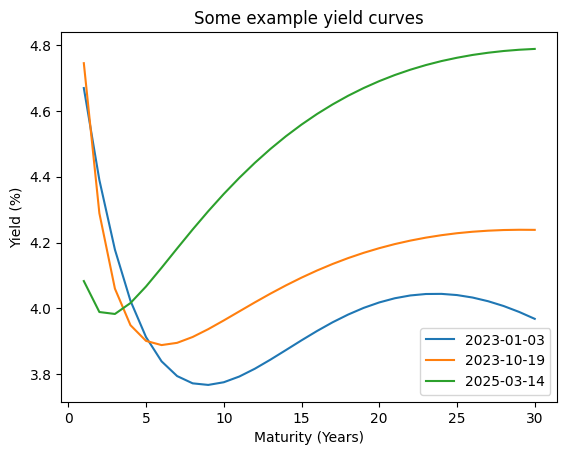

In [5]:
years = list(range(1, 31)) # Maturities for 1 to 30 y

# Extract Zero-Coupon Yields R(t) (SVENYXX)
Rt_cols = [f'SVENY{str(y).zfill(2)}' for y in years]

# remove rows with NaN
df = df.dropna(subset=Rt_cols)
Rt = df[Rt_cols].values # (n, 30) np array

print('data shape', Rt.shape)

plt.plot(years, Rt[0], label=str(df['Date'].dt.date.values[0]))
plt.plot(years, Rt[250], label=str(df['Date'].dt.date.values[200]))
plt.plot(years, Rt[-1], label=str(df['Date'].dt.date.values[-1]))
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Some example yield curves')
plt.legend()

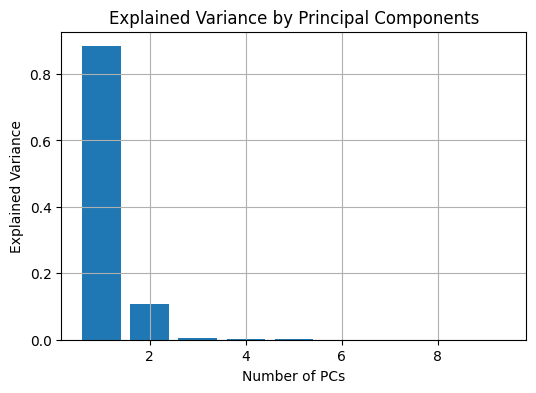

In [6]:
Rt_centered = Rt - Rt.mean(axis=0)

# SVD decomposition
U, S, Vt = np.linalg.svd(Rt_centered, full_matrices=False)

# Principal components (scores)
scores = U @ np.diag(S)

# Loadings (directions)
PC = Vt.T

# Explained variance
var_i = (S ** 2) / (Rt.shape[0] - 1)
var_i_ratio = var_i / var_i.sum()

plt.figure(figsize=(6, 4))
plt.bar(range(1, 10), var_i_ratio[:9])
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


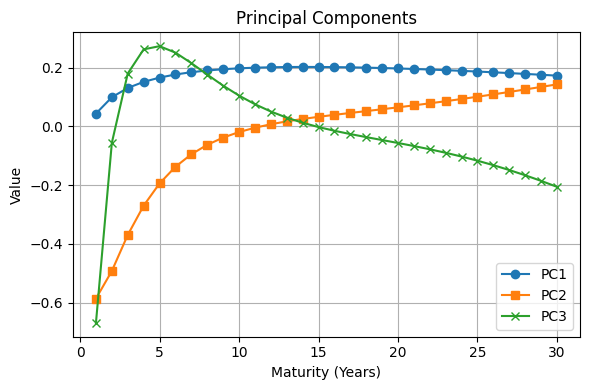

In [7]:
# plot first 3 PCs
plt.figure(figsize=(6,4))
plt.plot(years, PC[:, 0], label='PC1', marker='o')
plt.plot(years, PC[:, 1], label='PC2', marker='s')
plt.plot(years, PC[:, 2], label='PC3', marker='x')
plt.xlabel('Maturity (Years)')
plt.ylabel('Value')
plt.title('Principal Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


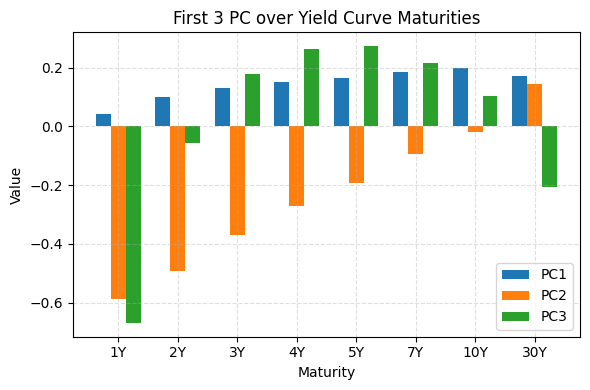

In [8]:
# Consider 8 maturities
maturities = ['1Y', '2Y', '3Y', '4Y', '5Y', '7Y', '10Y', '30Y']
T_indices = [0, 1, 2, 3, 4, 6, 9, 29]
x = np.arange(len(maturities))  # Positions
PC1 = PC[:, 0][T_indices]
PC2 = PC[:, 1][T_indices]
PC3 = PC[:, 2][T_indices]


plt.figure(figsize=(6, 4))
bar_width = 0.25

plt.bar(x - bar_width, PC1, width=bar_width, label='PC1')
plt.bar(x, PC2, width=bar_width, label='PC2')
plt.bar(x + bar_width, PC3, width=bar_width, label='PC3')

plt.xticks(x, maturities)
plt.xlabel('Maturity')
plt.ylabel('Value')
plt.title('First 3 PC over Yield Curve Maturities')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Example RV strategy using PCA

Given PCA, we may want a portfolio that is immune to changes in PC1 and PC2, but only reflecting PC3. i.e. We want to hedge our delta (DV01) exposure to parallel up/down movements of rates and steepening/flattening of the curve, and only trade convexity.

We construct our portflio with $\sum w_i B_i$, where $\{B_i\}_{i=1}^{30}$ represent bonds of maturities from 1Y to 30Y, and $w_i$ is portfolio weights

Let the delta (DV01, how much asset moves w.r.t. 1bps change)  of each $B_i$ be $\delta_i$.   
(note: long position means negative delta, as rate increase means bond drop)

### Hedging PC1

Our total delta is $w \cdot \delta$. To hedge against PC1, we need $w \cdot \delta = 0$

### Hedging PC2

We group portfolio into buckets. E.g. compute total delta for short end (0-2Y): $\delta_s = \delta_{0:2} = \sum_{i=0}^2 \delta_i$,
mid-term (2Y-7Y)  $\delta_m = \delta_{2:7}$, long-term $\delta_l$

Then to be flat on a steepner/flattener, we hedge $\delta_l = \delta_s$

### Trading PC3

perfect hedging is not possible, but by construction, PC3 is independent with PC1 and PC2, so simply taking $w \cdot \delta = PC3$ allows us to trade convexity, and in theory be flat to movements in PC1 and PC2. 

(E.g. our delta position in 1Y bond is given by $w_1 \cdot \delta_1$, which we want to set equal to PC3[0], and so on)

following the plot, we can long 1Y and 30Y (short delta), and short the mid-terms (long delta), so that we are long convexity. The other direction is vice versa


